### Created on 2023
### @author: S.W

------

#### 만약 opencv 패키지가 import가 되지 않는다면 아래 셀 실행

In [1]:
import cv2

In [ ]:
# python -m pip install --upgrade pip

In [ ]:
# !pip install opencv-python

In [ ]:
# !pip install opencv-contrib-python

# 1. Read & Write

### 1) 이미지 불러오기

- 기본 입출력
- 영상 읽고 쓰는 방법과 마우스와 키보드 이벤트 처리


#### cv2.imread(이미지 파일명, 읽기 모드)<br>
읽기 모드(mode_flag)<br>
1) cv2.IMREAD_COLOR : 컬러(BGR) 스케일로 읽기, 기본값<br>
2) cv2.IMREAD_UNCHANGED : 파일 그대로 읽기<br>
3) cv2.IMREAD_GRAYSCALE : 그레이(흑백) 스케일로 읽기<br>

#### cv2.imshow(창 이름, 이미지)<br>
key=cv2.waitKey([키보드 입력 대기 시간])<br>
delay = 0 : 키보드 입력을 대기할 시간(ms), 0(무한대, 기본값)<br>
key: 사용자가 입력한 키값 리턴<br>
-1: 대기시간 동안 키 입력 없음<br>

In [2]:
import cv2

img_file='./img/girl.jpg'

img=cv2.imread(img_file)  # numpy로 리턴
print(img)
print(type(img))
print(img.shape)

if img is not None :
    cv2.imshow('IMG', img)  # 이미지를 화면에 표시
    cv2.waitKey()   # 키보드의 입력 있을 때까지 이미지 보여줌 
    cv2.destroyAllWindows()  # 출력한 창을 모두 닫고 나서 프로그램을 종료
    cv2.waitKey(1)
    
else:
    print('No image file.')

[[[ 54  70  76]
  [ 48  67  70]
  [ 41  68  65]
  ...
  [ 24  72  54]
  [ 31  76  59]
  [ 35  80  63]]

 [[ 53  69  75]
  [ 47  68  70]
  [ 41  68  64]
  ...
  [ 26  74  56]
  [ 32  77  60]
  [ 35  80  63]]

 [[ 53  69  75]
  [ 46  67  68]
  [ 39  69  64]
  ...
  [ 28  76  58]
  [ 31  79  61]
  [ 35  80  63]]

 ...

 [[ 29  94  68]
  [ 38 104  75]
  [ 47 115  84]
  ...
  [218 190 203]
  [219 192 202]
  [222 192 203]]

 [[ 28  94  65]
  [ 37 104  75]
  [ 47 117  86]
  ...
  [218 190 203]
  [222 192 203]
  [224 194 205]]

 [[ 25  92  63]
  [ 36 103  74]
  [ 46 116  85]
  ...
  [223 193 206]
  [226 196 207]
  [229 199 210]]]
<class 'numpy.ndarray'>
(293, 406, 3)


GrayScale인 경우 cv2.IMREAD_COLOR로 읽는대로 컬러로 로딩되지 않음, 컬러 스페이스와 연관

In [3]:
import cv2

img_file='./img/girl.jpg'

img1=cv2.imread(img_file)  # numpy로 리턴
img2=cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)

if img is not None :
    cv2.imshow('BGR IMG', img1)  
    cv2.imshow('GrayScale', img2)
    cv2.waitKey()   # 키보드의 입력 있을 때까지 이미지 보여줌
    cv2.destroyAllWindows()  # 출력한 창을 모두 닫고 나서 프로그램을 종료
    cv2.waitKey(1)
else:
    print('No image file.')

### 2) 이미지 저장하기

In [4]:
import cv2

img_file='./img/girl.jpg'

img1=cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
cv2.imshow('GrayScale', img1)
cv2.imwrite('./out/girl_gray.jpg', img1)  # 이미지 저장하기

key = cv2.waitKey()   
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 3) 동영상 및 카메라 프레임 읽기
동영상 파일이나 컴퓨터에 연결한 카메라 장치로부터 연속된 이미지 프레임을 읽을 수 있는 API 제공
    
#### cap=cv2.VideoCapture(파일경로 또는 인덱스[카메라 장치 번호]) 
- 비디오 캡처 객체 생성자
- cap 비디오 캡처 객체

#### ret=cap.isOpened() : 객체 초기화 확인
- ret: 초기화 여부, True/False

#### ret, img = cap.read() : 영상 프레임 읽기
- ret: 프레임 읽기 성공 또는 실패 여부, True/False
- img: 프레임 이미지, Numpy 또는 None

#### cap.set(id, value) : 프로퍼티 변경
#### cap.get(id) : 프로퍼티 확인
#### cap.release() : 캡처 자원 반납

<br>

동영상 다운로드 사이트<br>
- http://bbb3d.renderfarming.net/download.html

In [5]:
import cv2

video_file = "./img/big_buck.avi" # 동영상 파일 경로

cap = cv2.VideoCapture(video_file) # 동영상 캡쳐 객체 생성 
cap.isOpened()  # 객체 초기화 여부 확인

if cap.isOpened():                 # 캡쳐 객체 초기화 확인
    while True:
        ret, img = cap.read()      # 다음 프레임 읽기 
        if ret:                     # 프레임 읽기 정상
            cv2.imshow(video_file, img) # 화면에 표시
            key = cv2.waitKey(25)   # 25ms 지연(40fps로 가정)
            if key != -1:
                break
        else:                       # 다음 프레임 읽을 수 없음,
            break                   # 재생 완료
else:
    print("can't open video.")      # 캡쳐 객체 초기화 실패
    
cap.release()                       # 캡쳐 자원 반납
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### 지연시간 계산 방법
지연시간 = 1000 / FPS
- FPS(Frame Per Second, 초당 프레임 수)<br>

1000 을 기준으로 하는 이유는 1초를 밀리초(ms) 단위로 환산해서 제공해야 되기 때문<br>
40 FPS 인 경우 → 25 = 1000 / 40<br>

### 4) 카메라(웹캠) 프레임 읽기

cv2.VideoCapture(카메라 장치 인덱스 번호를 정수로 지정)

In [6]:
import cv2

cap = cv2.VideoCapture(0)               # 0번 카메라 장치 연결
if cap.isOpened():                      # 캡처 객체 연결 확인
    while True:
        ret, img = cap.read()           # 다음 프레임 읽기
        if ret:
            cv2.imshow('camera', img)   # 다음 프레임 이미지 표시
            if cv2.waitKey(1) != -1:    # 1ms 동안 키 입력 대기
                break                   # 아무 키라도 입력이 있으면 중지
        else:
            print('no frame')
            break
else:
    print("can't open camera.")
    
cap.release()                           # 자원 반납
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### 비디오, 카메라 속성 제어

In [8]:
import cv2

video_file = "./img/big_buck.avi"   # 동영상 파일 경로

cap = cv2.VideoCapture(video_file)  # 동영상 캡쳐 객체 생성

if cap.isOpened():                  # 캡쳐 객체 초기화 확인
    fps = cap.get(cv2.CAP_PROP_FPS) # 동영상의 프레임 수 구하기
    delay = int(1000/fps)
    print("FPS: %f, Delay: %dms" %(fps, delay))

    while True:
        ret, img = cap.read()            # 다음 프레임 읽기
        if ret:                          # 프레임 읽기 정상
            cv2.imshow(video_file, img)  # 화면에 표시
            key = cv2.waitKey(delay)     # fps에 맞게 시간 지연
            if key == ord('q'):
                # 'q'를 누르면 영상 종료
                break
        else:
            break                   # 다음 프레임 읽을 수 없슴, 재생 완료
else:
    print("can't open video.")      # 캡쳐 객체 초기화 실패
    
cap.release()                       # 캡쳐 자원 반납
cv2.destroyAllWindows()
cv2.waitKey(1)

FPS: 24.000000, Delay: 41ms


-1

#### 카메라 프레임 크기 설정
 - 동영상 파일에 프레임 크기 재지정하는 것은 적용되지 않음

In [9]:
import cv2

cap = cv2.VideoCapture(0)                     # 카메라 0번 장치 연결

width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)     # 프레임 폭 값 구하기
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)   # 프레임 높이 값 구하기
print("Original width: %d, height:%d" % (width, height)) 

Original width: 1920, height:1080


In [10]:
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)        # 프레임 폭을 320으로 설정
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)       # 프레임 높이를 240으로 설정
width_1 = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # 재지정한 프레임 폭 값 구하기
height_1 = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # 재지정한 프레임 폭 값 구하기

print("Resized width: %d, height:%d" % (width_1, height_1)) # (640, 480)

Resized width: 640, height:480


단, 카메라마다 지원하는 고유의 크기가 있어 변경이 불가능한 경우도 있음. 그 경우 resize 함수를 통해 변경해야함.

In [11]:
if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            cv2.namedWindow("camera", cv2.WINDOW_NORMAL)   # "camera"라는 이름의 윈도우 생성
            cv2.resizeWindow("camera", 320, 240)           # 생성한 윈도우의 사이즈를 변경 (변경할 윈도우의 이름, 너비, 높이)
            
            cv2.imshow('camera', img)
            if cv2.waitKey(1) != -1:
                break
        else:
            print('no frame!')
            break
else:
    print("can't open camera!")
    
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### 비디오 파일 저장하기 (순간 캡쳐)

In [64]:
import cv2

cap = cv2.VideoCapture(0)                       # 0번 카메라 연결
if cap.isOpened() :
    while True:
        ret, frame = cap.read()                 # 카메라 프레임 읽기
        if ret:
            cv2.imshow('camera',frame)          # 프레임 화면에 표시
            if cv2.waitKey(1) != -1:            # 아무 키나 누르면
                cv2.imwrite('./out/photo.jpg', frame) # 프레임을 'photo.jpg'에 저장
                break
        else:
            print('no frame!')
            break
else:
    print('no camera!')
cap.release()
cv2.destroyAllWindows()

#### 하나의 프레임이 아닌 여러 프레임을 동영상으로 저장
- cv2.VideoWriter() API 사용

----
**writer = cv2.VideoWriter(파일 경로, forcc[비디오 인코딩], fps[초당프레임수], (프레임폭, 너비))**
- writer: 프레임 저장 객체
- writer.write(저장할 frame) : 프레임 저장
- writer.set(id, value) : 프로퍼티 변경
- writer.get(id) : 프로퍼티 확인
  
**ret = writer.fourcc(c1, c2, c3, c4) : fourcc 코드 생성**
- c1, c2, c3, c4 : 인코딩 형식 4글자, 'MJPG', 'DIVX' 등
 
ret : fourcc 코드
 
**cv2.VideoWriter_fourcc(c1,c2,c3,c4)**
- cv2.VideoWriter.fourcc(c1, c2, c3, c4) 동일 

(코덱 확인) https://www.fourcc.org/codecs.php


In [12]:
import cv2

cap = cv2.VideoCapture(0)            # 0번 카메라 연결

if cap.isOpened:
    file_path = './out/record.avi'   # 저장할 파일 경로 이름 
    fps = 30.0                       # FPS, 초당 프레임 수
    fourcc = cv2.VideoWriter_fourcc(*'DIVX') # 영상 파일의 코덱, 압축 방식, 색상, 픽셀 포맷 등을 정의하는 정수 값
    
    # 인코딩 포맷 문자
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    size = (int(width), int(height))  # 프레임 크기
    out = cv2.VideoWriter(file_path, fourcc, fps, size)
    
    # VideoWriter 객체 생성
    while True:
        ret, frame = cap.read()
        if ret:
            cv2.imshow('camera-recording',frame)
            out.write(frame)      # 파일 저장
            
            if cv2.waitKey(int(1000/fps)) != -1: 
                break
        else:
            print("no frame!")
            break
    out.release()    # 파일 닫기
else:
    print("can't open camera!")
    
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

# 2. Drawing

#### 실습용 이미지 생성

In [13]:
import cv2
import numpy as np

img = np.full((500,500,3), [255, 255, 255], dtype=np.uint8) # 3차원 빈 캔버스 생성
cv2.imwrite('./img/blank.jpg', img)

# 저장한 이미지 확인
cv2.imshow("blank", img)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 1) 직선 그리기

#### cv2.line() 사용법

cv2.line(img, start, end, color[, thickness, lineType])<br>
- img: 그림 그릴 이미지, numpy 타입
- start: 선 시작 좌표, (x,y) 튜플로 지정
- end: 선 끝 좌표, (x,y) 튜플로 지정
- color: 선 색상, BGR(Blue, Green, Red), 0-255
- thickness = 1 : 선 두께
- lineType = cv2.LINE_4/cv2.LINE_8/cv2.LINE_AA<br>
  .cv2.LINE_4: 4 연결선 알고리즘<br>
  .cv2.LINE_8: 8 연결선 알고리즘<br>
  .cv2.LINE_AA: 안티엘리어싱<br>
  .브레젠햄(Bresenham) 알고리즘 사용(https://en.wikipedia.org/wiki/Bresenham%27s_line_algorithm)

In [15]:
import cv2

img = cv2.imread('./img/blank.jpg')

cv2.line(img, (50, 50), (150, 50), (255,0,0))   # 파란색 1픽셀 선
cv2.line(img, (200, 50), (300, 50), (0,255,0))  # 초록색 1픽셀 선
cv2.line(img, (350, 50), (450, 50), (0,0,255))  # 빨간색 1픽셀 선

cv2.imshow('lines', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [16]:
import cv2

img = cv2.imread('./img/blank.jpg')

# 하늘색(파랑+초록) 10픽셀 선      
cv2.line(img, (100, 100), (400, 100), (255,255,0), 10)          
# 분홍(파랑+빨강) 10픽셀 선      
cv2.line(img, (100, 150), (400, 150), (255,0,255), 10)          
# 노랑(초록+빨강) 10픽셀 선      
cv2.line(img, (100, 200), (400, 200), (0,255,255), 10)          
# 회색(파랑+초록+빨강) 10픽셀 선  
cv2.line(img, (100, 250), (400, 250), (200,200,200), 10)        
# 검정 10픽셀 선    
cv2.line(img, (100, 300), (400, 300), (0,0,0), 10)                    

cv2.imshow('lines', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [17]:
import cv2

img = cv2.imread('./img/blank.jpg')

# 4연결 선
cv2.line(img, (100, 350), (400, 400), (0,0,255), 20, cv2.LINE_4)   
# 8연결 선
cv2.line(img, (100, 400), (400, 450), (0,0,255), 20, cv2.LINE_8)    
# 안티에일리어싱 선 
cv2.line(img, (100, 450), (400, 500), (0,0,255), 20, cv2.LINE_AA)   
# 대각선 
cv2.line(img, (0,0), (500,500), (0,0,255))                      

cv2.imshow('lines', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 2) 사각형 그리기

#### cv2.rectangle() 함수 사용법
cv2.rectangle(img, start, end, color[, thickness, lineType])
- img: 그림 그릴 이미지, numpy 타입
- start: 사각형 시작 좌표, (x,y) 튜플로 지정
- end: 사각형 끝 좌표, (x,y) 튜플로 지정
- color: 선 색상, BGR(Blue, Green, Red), 0-255
- thickness=1 : 선 두께
  -1 : 채우기
- lineType=cv2.LINE_4/cv2.LINE_8/cv2.LINE_AA
  .cv2.LINE_4: 4 연결선 알고리즘<br>
  .cv2.LINE_8: 8 연결 선 알고리즘<br>
  .cv2.LINE_AA: 안티엘리어싱<br>
  .브레젠햄(Bresenham) 알고리즘 사용(https://en.wikipedia.org/wiki/Bresenham%27s_line_algorithm)
  

In [18]:
import cv2

img = cv2.imread('./img/blank.jpg')

# 사각형 그리기1(왼쪽 상단에서 오른쪽 하단으로)
cv2.rectangle(img, (50, 50), (150, 150), (255,0,0) )        
# 사각형 그리기1(오른쪽 하단에서 왼쪽 상단으로)
cv2.rectangle(img, (300, 300), (100, 100), (0,255,0), 10 )  
# 사각형 채워 그리기(오른쪽 상단에서 왼쪽 하단으로)
cv2.rectangle(img, (450, 200), (200, 450), (0,0,255), -1 )  

cv2.imshow('rectangle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 3) 다각형 그리기

#### cv2.polylines() 함수 사용법
cv2.polylines(img, points, isClosed, color[, thickness, lineType])
- img: 그림 그릴 이미지, numpy 타입
- points: 꼭지점 좌표, Numpy 배열 리스트
- isClosed: 닫힌 도형 여부, True/False
- color: 선 색상, BGR(Blue, Green, Red), 0-255
- thickness=1 : 선 두께, 채우기 지원 안함
- lineType=cv2.LINE_4/cv2.LINE_8/cv2.LINE_AA
  .cv2.LINE_4: 4 연결선 알고리즘<br>
  .cv2.LINE_8: 8 연결 선 알고리즘<br>
  .cv2.LINE_AA: 안티엘리어싱<br>
  .브레젠햄(Bresenham) 알고리즘 사용(https://en.wikipedia.org/wiki/Bresenham%27s_line_algorithm)


In [19]:
import cv2
import numpy as np

img = cv2.imread('./img/blank.jpg')

# Numpy array로 좌표 생성
# 번개 모양 선
pts1 = np.array([[50,50], [150,150], [100,140], [200,240]], dtype=np.int32)
# 삼각형
pts2 = np.array([[350,50], [250,200], [450,200]], dtype=np.int32) 
# 삼각형
pts3 = np.array([[150,300], [50,450], [250,450]], dtype=np.int32) 
# 5각형
pts4 = np.array([[350,250], [450,350], [400,450], [300,450], [250,350]],\
                 dtype=np.int32) 

    
# 다각형 그리기
cv2.polylines(img, [pts1], False, (255,0,0))       # 번개 모양 선 그리기
cv2.polylines(img, [pts2], False, (0,0,0), 10)     # 3각형 열린 선 그리기 
cv2.polylines(img, [pts3], True, (0,0,255), 10)    # 3각형 닫힌 도형 그리기
cv2.polylines(img, [pts4], True, (0,0,0))          # 5각형 닫힌 도형 그리기

cv2.imshow('polyline', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 4) 원/타원/호 그리기

#### cv2.circle() 함수 사용법: 원 제작
cv2.circle(img, center, radius, color[, thickness, lineType])
- img: 그림 그릴 이미지, numpy 타입
- center: 원점 좌표
- radius: 반지름
- color: 선 색상, BGR(Blue, Green, Red), 0-255
- thickness=1 : 선 두께, -1 채우기 지원
- lineType=cv2.LINE_4/cv2.LINE_8/cv2.LINE_AA
  .cv2.LINE_4: 4 연결선 알고리즘
  .cv2.LINE_8: 8 연결 선 알고리즘
  .cv2.LINE_AA: 안티엘리어싱
  .브레젠햄(Bresenham) 알고리즘 사용(https://en.wikipedia.org/wiki/Bresenham%27s_line_algorithm)

In [21]:
import cv2

img = cv2.imread('./img/blank.jpg')


# 원점(150,150), 반지름 100
cv2.circle(img, (150, 150), 100, (255,0,0))     
# 원점(300,150), 반지름 70
cv2.circle(img, (300, 150), 70, (0,255,0), 5)   
# 원점(400,150), 반지름 50, 채우기
cv2.circle(img, (400, 150), 50, (0,0,255), -1) 

cv2.imshow('circle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### cv2.ellipse() 함수 사용법: 호/타원 제작
cv2.ellipse(img, center, axes, angle, from, to, color[, thickness, lineType])
- img: 그림 그릴 이미지, numpy 타입
- center: 원점 좌표
- axes: 기준 축 길이
- angle: 기준 축 회전 각도
- from, to: 호를 그릴 시작 각도와 끝 각도

In [23]:
import cv2

img = cv2.imread('./img/blank.jpg')

# 원점(50,300), 반지름(50), 회전 0, 0도 부터 360도 그리기
cv2.ellipse(img, (50, 300), (50, 50), 0, 0, 360, (0,0,255))    
# 원점(150, 300), 아래 반원 그리기
cv2.ellipse(img, (150, 300), (50, 50), 0, 0, 180, (255,0,0))    
# 원점(200, 300), 윗 반원 그리기
cv2.ellipse(img, (200, 300), (50, 50), 0, 181, 360, (0,0,255))   

cv2.imshow('circle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [24]:
import cv2

img = cv2.imread('./img/blank.jpg')


# 원점(325, 300), 반지름(75,50) 납작한 타원 그리기
cv2.ellipse(img, (325, 300), (75, 50), 0, 0, 360, (0,255,0))    
# 원점(450,300), 반지름(50,75) 홀쭉한 타원 그리기
cv2.ellipse(img, (450, 300), (50, 75), 0, 0, 360, (255,0,255))

cv2.imshow('circle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [25]:
import cv2

img = cv2.imread('./img/blank.jpg')

# 원점(50, 425), 반지름(50,75), 회전 15도
cv2.ellipse(img, (50, 425), (50, 75), 15, 0, 360, (0,0,0))    
# 원점(200,425), 반지름(50,75), 회전 45도
cv2.ellipse(img, (200, 425), (50, 75), 45, 0, 360, (0,0,0))    

cv2.imshow('circle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [26]:
import cv2

img = cv2.imread('./img/blank.jpg')

# 원점(350,425), 홀쭉한 타원 45도 회전 후 아랫 반원 그리기
cv2.ellipse(img, (350, 425), (50, 75), 45, 0, 180, (0,0,255))    
# 원점(400,425), 홀쭉한 타원 45도 회전 후 윗 반원 그리기
cv2.ellipse(img, (400, 425), (50, 75), 45, 181, 360, (255,0,0))    

cv2.imshow('circle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 5) 이미지에 글자 쓰기

#### cv2.putText() 함수 사용법: 원 제작
cv2.putText(img, text, point, fontFace, fontSize, color[, thickness, lineType])
- img: 문자열을 표시할 이미지, numpy 타입
- text: 표시할 문자열
- point: 문자열을 표시할 좌표(문자열 기준 좌측 하단)
- fontFace: 글꼴
- fontSize: 글꼴 크기

#### 산세리프체: 세리프가 없다는 의미
즉, 고딕체 처럼 획에 특별히 모양이 낸 것이 없는 글꼴을 지칭<br>
cv2.FONT_HERSHEY_PLAIN: 산세리프체 작은 글꼴<br>
cv2.FONT_HERSHEY_SIMPLE: 산세리프체 일반 글꼴<br>
cv2.FONT_HERSHEY_DUPLEX: 산세리프체 진한 글꼴<br>

#### 세리프체: 명조체처럼 글자 끝에 장식을 붙여 모양을 낸 글꼴 통틀어 지칭
cv2.FONT_HERSHEY_COMPLEX_SMALL: 세리프체 작은 글꼴<br>
cv2.FONT_HERSHEY_COMPLEX: 세리프체 일반 글꼴<br>
cv2.FONT_HERSHEY_TRIPLEX: 세리프체 진한 글꼴<br>

#### 필기체
cv2.FONT_HERSHEY_SCRIPT_SIMPLEX: 필기체 산세리프 글꼴<br>
cv2.FONT_HERSHEY_SCRIPT_COMPLEX: 필기체 세리프 글꼴<br>
cv2.FONT_ITALIC: 이탤리체 플래그<br>


In [28]:
import cv2

img = cv2.imread('./img/blank.jpg')

# 산세리프체 작은 글꼴(sans-serif small)
cv2.putText(img, "Plain", (50, 30), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0,0))            
# sans-serif normal
cv2.putText(img, "Simplex", (50, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0,0))        
# sans-serif bold
cv2.putText(img, "Duplex", (50, 110), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0,0))         
# sans-serif normall
cv2.putText(img, "Simplex", (200, 110), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,250)) 

cv2.imshow('draw text', img)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [29]:
import cv2

img = cv2.imread('./img/blank.jpg')

# 세리프체 작은 글꼴(serif small)
cv2.putText(img, "Complex Small", (50, 180), cv2.FONT_HERSHEY_COMPLEX_SMALL, \
            1, (0, 0,0))   
# serif normal
cv2.putText(img, "Complex", (50, 220), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0,0))
# serif bold
cv2.putText(img, "Triplex", (50, 260), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 0,0))               
# serif normal
cv2.putText(img, "Complex", (200, 260), cv2.FONT_HERSHEY_TRIPLEX, 2, (0,0,255)) 

cv2.imshow('draw text', img)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [31]:
import cv2

img = cv2.imread('./img/blank.jpg')
# hand-wringing sans-serif
cv2.putText(img, "Script Simplex", (50, 330), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, \
            1, (0, 0,0)) 
# hand-wringing serif
cv2.putText(img, "Script Complex", (50, 370), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, \
            1, (0, 0,0)) 

# sans-serif + italic
cv2.putText(img, "Plain Italic", (50, 430), \
            cv2.FONT_HERSHEY_PLAIN | cv2.FONT_ITALIC, 1, (0, 0,0)) 
# sarif + italic
cv2.putText(img, "Complex Italic", (50, 470), \
            cv2.FONT_HERSHEY_COMPLEX | cv2.FONT_ITALIC, 1, (0, 0,0)) 

cv2.imshow('draw text', img)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 6) 창 관리

#### cv2.namedWindow() 사용법: window에 이름 부여, 이름을 갖는 창 열기
cv2.namedWindow(title [, option])
- title: 창 이름, 제목 줄에 표시
- option: 창 옵션, 'cv2.WINDOW_'로 시작<br>
cv2.WINDOW_NORMAL: 임의 크기, 사용자 창 크기 조정 가능<br>
cv2.WINDOW_AUTOSIZE: 이미지와 같은 크기, 창 크기 재조정 불가능

In [43]:
import cv2

file_path = './img/girl.jpg'
img = cv2.imread(file_path) # 이미지를 기본 값으로 읽기
img_gray = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) # 이미지를 그레이 스케일로 읽기


cv2.namedWindow('origin')                   # origin 이름으로 창 생성
cv2.namedWindow('gray', cv2.WINDOW_NORMAL)  # gray 이름으로 창 생성

cv2.imshow('origin', img)     # origin 창에 이미지 표시
cv2.imshow('gray', img_gray)  # gray 창에 이미지 표시

cv2.waitKey(0)  
cv2.destroyAllWindows() 
cv2.waitKey(1)

-1

#### cv2.resizeWindow() 사용법: 창 크기 변경
cv2.resizeWindow(title, width, height)<br>
- title: 크기를 변경할 창 이름<br>
- width, height: 크기를 변경할 창의 폭과 높이<br>

-----

#### cv2.moveWindow() 사용법: 창 위치 이동
cv2.moveWindow(title, x, y)
 - title: 위치를 변경할 창 이름
 - x,y: 이동할 창의 위치
 

In [44]:
# cv2.WINDOW_NORMAL: 원본이미지 크기로 만들 수 있지만 사용자가 크기를 바꿀 수 있다.
# cv2.WINDOW_AUTOSIZE: 원본이미지 크기로 고정하여 윈도우를 생성한다.(defualt)
cv2.namedWindow('origin')                   # origin 이름으로 창 생성
cv2.namedWindow('gray', cv2.WINDOW_NORMAL)  # gray 이름으로 창 생성

cv2.imshow('origin', img)   # origin 창에 이미지 표시
cv2.imshow('gray', img_gray) 

cv2.moveWindow('origin', 0, 0)  # 창 위치 변경
cv2.moveWindow('gray', 100, 100)  # 창 위치 변경

cv2.waitKey(0)      # 아무키나 누르면
cv2.resizeWindow('origin', 100, 100)  # 창 크기 변경 (변경 안됨)
cv2.resizeWindow('gray', 100, 100)  # 창 크기 변경 (변경 됨)

cv2.waitKey(0)      
cv2.destroyAllWindows()  
cv2.waitKey(1)

-1

### 7) 마우스 이벤트

#### 클릭으로 원 그리기

In [45]:
import cv2

title = 'mouse event'                   # 창 제목
img = cv2.imread('./img/blank.jpg')     # 백색 이미지 읽기
cv2.imshow(title, img)                  # 백색 이미지 표시

def onMouse(event, x, y, flags, param):         # 아무스 콜백 함수 구현 ---①
    print(event, x, y, )                        # 파라미터 출력
    if event == cv2.EVENT_LBUTTONDOWN:          # 왼쪽 버튼 누름인 경우 ---②
        cv2.circle(img, (x,y), 30, (0,0,0), -1) # 지름 30 크기의 검은색 원을 해당 좌표에 그림
        cv2.imshow(title, img)                  # 그려진 이미지를 다시 표시 ---③

cv2.setMouseCallback(title, onMouse)    # 마우스 콜백 함수를 GUI 윈도우에 등록 ---④

while True:
    if cv2.waitKey(0) & 0xFF == 27:     # esc로 종료
        break
        
cv2.destroyAllWindows()
cv2.waitKey(1)

0 287 436
0 304 389
0 326 333
0 335 307
0 337 297
0 336 286
0 333 280
0 330 278
0 325 275
0 319 272
0 316 272
0 315 270
0 314 268
0 312 266
0 311 266
1 312 266
0 312 266
4 312 266
0 312 266
0 312 265
0 311 265
0 306 263
0 297 258
0 288 252
0 283 248
0 281 246
0 279 243
0 277 240
0 268 226
0 264 221
0 261 217
0 260 216
0 259 215
0 259 214
0 258 214
0 257 213
0 255 212
0 253 211
1 246 208
0 246 208
0 239 207
0 231 204
0 222 202
0 215 201
0 207 200
0 197 200
0 183 200
0 175 199
0 153 199
0 145 198
0 141 198
0 140 198
0 139 199
0 138 201
0 137 204
0 135 209
0 134 212
0 132 216
0 132 220
0 130 225
0 130 230
0 130 239
0 131 242
0 135 251
0 139 255
0 149 258
0 167 261
0 193 261
4 223 258
0 240 255
0 261 250
0 277 244
0 284 240
0 287 237
0 288 234
0 288 234
1 288 234
0 288 234
0 288 234
0 288 234
4 288 234
0 287 235
0 287 235
0 287 237
0 285 242
0 284 249
1 283 252
0 278 266
0 278 266
0 276 269
0 272 273
4 257 275
0 245 276
0 218 276
0 201 276
0 185 276
1 183 277
0 183 277
0 183 277
4 184 277


-1

#### 키보드와 마우스를 함께 사용하는 이벤트

In [48]:
import cv2

title = 'mouse event'                   # 창 제목
img = cv2.imread('./img/blank.jpg')     # 백색 이미지 읽기
cv2.imshow(title, img)                  # 백색 이미지 표시

colors = {'black':(0,0,0),
         'red' : (0,0,255),
         'blue':(255,0,0),
         'green': (0,255,0) } # 색상 미리 정의

def onMouse(event, x, y, flags, param): # 아무스 콜백 함수 구현 ---①
    print(event, x, y, flags)           # 파라미터 출력
    color = colors['black']
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 버튼 누름인 경우 ---②
        # 컨트롤키와 쉬프트 키를 모두 누른 경우
        if flags & cv2.EVENT_FLAG_CTRLKEY and flags & cv2.EVENT_FLAG_SHIFTKEY : 
            color = colors['green']
        elif flags & cv2.EVENT_FLAG_SHIFTKEY : # 쉬프트 키를 누른 경우
            color = colors['blue']
        elif flags & cv2.EVENT_FLAG_CTRLKEY : # 컨트롤 키를 누른 경우
            color = colors['red']
        # 지름 30 크기의 검은색 원을 해당 좌표에 그림
        cv2.circle(img, (x,y), 30, color, -1) 
        cv2.imshow(title, img)          # 그려진 이미지를 다시 표시 ---③

cv2.setMouseCallback(title, onMouse)    # 마우스 콜백 함수를 GUI 윈도우에 등록 ---④

while True:
    if cv2.waitKey(0) & 0xFF == 27:     # esc로 종료
        break
cv2.destroyAllWindows()
cv2.waitKey(1)

0 167 26 0
0 108 79 0
0 61 125 0
0 45 136 0
0 39 138 0
0 38 138 0
0 39 138 0
0 45 136 0
0 62 136 0
0 106 141 0
0 141 148 0
0 162 153 0
0 174 156 0
0 180 157 0
0 181 157 0
1 181 157 1
0 180 157 1
4 180 157 1
0 180 157 0


-1

### 8) 트랙바로 원하는 값 조절

In [49]:
import cv2
import numpy as np

win_name = 'Trackbar'                                   # 창 이름

img = cv2.imread('./img/blank.jpg')
cv2.imshow(win_name,img)                                # 초기 이미지를 창에 표시

# 트랙바 이벤트 처리 함수 선언 ---①
def onChange(x):                                        
    print(x)                                            # 트랙바 새로운 위치 값 --- ②
    # 'R', 'G', 'B' 각 트랙바 위치 값    --- ③
    r = cv2.getTrackbarPos('R',win_name)               
    g = cv2.getTrackbarPos('G',win_name)               
    b = cv2.getTrackbarPos('B',win_name)               
    print(r, g, b)
    img[:] = [b,g,r]                                    # 기존 이미지에 새로운 픽셀 값 적용 --- ④
    cv2.imshow(win_name, img)                           # 새 이미지 창에 표시

# 트랙바 생성    --- ⑤
cv2.createTrackbar('R', win_name, 255, 255, onChange)  
cv2.createTrackbar('G', win_name, 255, 255, onChange)
cv2.createTrackbar('B', win_name, 255, 255, onChange)

while True:
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
cv2.destroyAllWindows()        
cv2.waitKey(1)

255
255 255 255
254
255 254 255
247
255 247 255
240
255 240 255
231
255 231 255
225
255 225 255
218
255 218 255
205
255 205 255
201
255 201 255
201
255 201 255
201
255 201 255
120
255 201 120
119
255 201 119
118
255 201 118
116
255 201 116
112
255 201 112
109
255 201 109
103
255 201 103
95
255 201 95
93
255 201 93
88
255 201 88
85
255 201 85
84
255 201 84
84
255 201 84
101
255 201 101
103
255 201 103
104
255 201 104
107
255 201 107
110
255 201 110
112
255 201 112
115
255 201 115
116
255 201 116
117
255 201 117
117
255 201 117
117
255 201 117
117
255 201 117
118
255 201 118
118
255 201 118
120
255 201 120
121
255 201 121
122
255 201 122
126
255 201 126
129
255 201 129
132
255 201 132
133
255 201 133
135
255 201 135
136
255 201 136
137
255 201 137
137
255 201 137
138
255 201 138
138
255 201 138
138
255 201 138
139
255 201 139
139
255 201 139
140
255 201 140
141
255 201 141
142
255 201 142
144
255 201 144
145
255 201 145
146
255 201 146
146
255 201 146
146
255 201 146
146
255 201 146
146


-1

# 3. transform

#### warpAffine() 사용법

dst = warpAffine(src, mtrx, dsize,[, dst, flags, borderMode, borderValue])

- src: 원본이미지(numpy)
- mtrx: 변환행렬, numpy, float32
- dsize: 결과 이미지 크기
- flags: 보간법 알고리즘 선택 플래그
  - cv2.INTER_LINEAR: 기본값, 인접한 4개 픽셀 값에 거리 가중치 사용
  - cv2.INTER_NEAREST: 가장 가까운 픽셀값 사용
  - cv2.INTER_AREA: 픽셀 영역 관계를 이용한 재샘플링
  - cv2.INTER_CUBIC: 인접한 16개 픽셀값에 거리 가중치 사용
  - cv2.INTER_LANCZOS4: 인접한 8개 픽셀을 이용한 란초 알고리즘
  - https://en.wikipedia.org/wiki/Lanczos_resampling
  
 
- borderMode: 외곽 영역 보정 플래그
  - cv2.BORDER_CONSTANT: 고정 색상 값(999|12345|999)
  - cv2.BORDER_REPLICATE: 가장 자리 복제(111|12345|555)
  - cv2.BORDER_WRAP: 반복(345|12345|555)
  - cv2.BORDER_REFLECT: 반사(321|12345|543)

- borderValue: cv2.BORDER_CONSTANT 경우 사용할 색상 값(기본값 = 0)

- dst: 이미지로 리턴(numpy)

In [51]:
import cv2
import numpy as np

img = cv2.imread('./img/fish.jpg')
rows,cols = img.shape[0:2]  # 영상의 크기

dx, dy = 100, 50            # 이동할 픽셀 거리

# 변환 행렬 생성 
mtrx = np.float32([[1, 0, dx],
                   [0, 1, dy]])  
# 단순 이동
dst = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy))   

# 탈락된 외곽 픽셀을 파랑색으로 보정
dst2 = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy), None, \
                        cv2.INTER_LINEAR, cv2.BORDER_CONSTANT, (255,0,0) )

# 탈락된 외곽 픽셀을 원본을 반사 시켜서 보정
dst3 = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy), None, \
                        cv2.INTER_LINEAR, cv2.BORDER_WRAP)

cv2.imshow('original', img)

cv2.waitKey(0)
cv2.imshow('trans',dst)

cv2.waitKey(0)
cv2.imshow('BORDER_CONSTATNT', dst2)

cv2.waitKey(0)
cv2.imshow('BORDER_FEFLECT', dst3)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### resize : 크기 변환

In [52]:
import cv2
import numpy as np

img = cv2.imread('./img/fish.jpg')
height, width = img.shape[:2]

# 0.5배 축소 변환 행렬
m_small = np.float32([[0.5, 0, 0],
                       [0, 0.5,0]])  
# 2배 확대 변환 행렬
m_big = np.float32([[3, 0, 0],
                     [0, 3, 0]])  

# 보간법 적용 없이 확대 축소
dst1 = cv2.warpAffine(img, m_small, (int(height*0.5), int(width*0.5)))
dst2 = cv2.warpAffine(img, m_big, (int(height*3), int(width*3)))

# 보간법 적용한 확대 축소
dst3 = cv2.warpAffine(img, m_small, (int(height*0.5), int(width*0.5)), \
                        None, cv2.INTER_AREA)
dst4 = cv2.warpAffine(img, m_big, (int(height*3), int(width*3)), \
                        None, cv2.INTER_CUBIC)

# 결과 출력
cv2.imshow("original", img)

cv2.waitKey(0)
cv2.imshow("small", dst1)
cv2.imshow("small INTER_AREA", dst3)

cv2.waitKey(0)
cv2.imshow("big", dst2)
cv2.imshow("big INTER_CUBIC", dst4)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### resize( ) 사용
- https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d

In [53]:
import cv2
import numpy as np

img = cv2.imread('./img/fish.jpg')
height, width = img.shape[:2]

# 크기 지정으로 축소
dst1 = cv2.resize(img, (int(width*0.5), int(height*0.5)), \
                         interpolation=cv2.INTER_AREA)

# 비율 지정으로 확대
dst2 = cv2.resize(img, None, None, 2, 2, cv2.INTER_CUBIC)

#--③ 결과 출력
cv2.imshow("original", img)
cv2.imshow("small", dst1)
cv2.imshow("big", dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### rotation : 회전

In [54]:
import cv2
import numpy as np

img = cv2.imread('./img/fish.jpg')
rows,cols = img.shape[0:2]

# 라디안 각도 계산(60진법을 호도법으로 변경)
d45 = 45.0 * np.pi / 180    # 45도
d90 = 90.0 * np.pi / 180    # 90도

# 회전을 위한 변환 행렬 생성
m45 = np.float32([[np.cos(d45), -1* np.sin(d45), rows//2],
                  [np.sin(d45), np.cos(d45), -1*cols//4]])
m90 = np.float32([[np.cos(d90), -1* np.sin(d90), rows],
                  [np.sin(d90), np.cos(d90), 0]])

# 회전 변환 행렬 적용
r45 = cv2.warpAffine(img,m45,(cols,rows))
r90 = cv2.warpAffine(img,m90,(rows,cols))

# 결과 출력
cv2.imshow("origin", img)

cv2.waitKey(0)
cv2.imshow("45", r45)
cv2.imshow("90", r90)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### 회전 변환 행렬 구하기: cv2.getRotationMatrix2D()
cv2.getRotationMatrix2D(center, angle, scale)
- center: 회전 축 중심좌표, 튜플(x,y)
- angle: 회전 각도, 60진법
- scale: 확대/축소 배율

In [57]:
import cv2

img = cv2.imread('./img/fish.jpg')
rows,cols = img.shape[0:2]

# 회전을 위한 변환 행렬 구하기
# 회전축:중앙, 각도:45, 배율:0.5
m45 = cv2.getRotationMatrix2D((cols/2,rows/2), 45, 0.5) 
# 회전축:중앙, 각도:90, 배율:1.5
m90 = cv2.getRotationMatrix2D((cols/2,rows/2), 90, 1.5) 

# 변환 행렬 적용
img45 = cv2.warpAffine(img, m45,(cols, rows))
img90 = cv2.warpAffine(img, m90,(cols, rows))

# 결과 출력
cv2.imshow('origin',img)

cv2.waitKey(0)
cv2.imshow("45", img45)
cv2.imshow("90", img90)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### 뒤틀기: 아핀 변환(affine transform)

변환 행렬 계산: getAffineTransform() 사용<br>
matrix = getAffineTransform(pts1, pts2)

- pts1: 변환 전 이미지 좌표 3개, 3X2 numpy 배열(float32)
- pts2: 변환 후 이미지 좌표 3개, pts1과 동일
- matrix: 변환행렬 반환, 2X3


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

file_name = './img/fish.jpg'
img = cv2.imread(file_name)
rows, cols = img.shape[:2]

# 변환 전, 후 각 3개의 좌표 생성
pts1 = np.float32([[100, 50], [200, 50], [100, 200]])
pts2 = np.float32([[100, 50], [200, 50], [100, 200]])
# pts2 = np.float32([[80, 70], [210, 60], [250, 120]])

print(pts1, "\n\n", pts2)
# 변환 전 좌표를 이미지에 표시
cv2.circle(img, (100,50), 5, (255,0), -1)
cv2.circle(img, (200,50), 5, (0,255,0), -1)
cv2.circle(img, (100,200), 5, (0,0,255), -1)

# 짝지은 3개의 좌표로 변환 행렬 계산
mtrx = cv2.getAffineTransform(pts1, pts2)


# 아핀 변환 적용
dst = cv2.warpAffine(img, mtrx, (int(cols*1.5), rows))

# 결과 출력
cv2.imshow('origin',img)

cv2.waitKey(0)
cv2.imshow('affin', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

[[100.  50.]
 [200.  50.]
 [100. 200.]] 

 [[100.  50.]
 [200.  50.]
 [100. 200.]]


-1

#### 원근 변환(perspective)

In [4]:
import cv2
import numpy as np

file_name = "./img/fish.jpg"
img = cv2.imread(file_name)
rows, cols = img.shape[:2]
print(rows, cols)

# 원근 변환 전 후 4개 좌표
pts1 = np.float32([[0,0], [0,rows], [cols, 0], [cols,rows]])
pts2 = np.float32([[100,50], [10,rows-50], [cols-100, 50], [cols-10,rows-50]])

# 변환 전 좌표를 원본 이미지에 표시
cv2.circle(img, (0,0), 10, (255,0,0), -1)
cv2.circle(img, (0,rows), 10, (0,255,0), -1)
cv2.circle(img, (cols,0), 10, (0,0,255), -1)
cv2.circle(img, (cols,rows), 10, (0,255,255), -1)

# 원근 변환 행렬 계산
mtrx = cv2.getPerspectiveTransform(pts1, pts2)

# 원근 변환 적용
dst = cv2.warpPerspective(img, mtrx, (cols, rows))

cv2.imshow("origin", img)
cv2.imshow('perspective', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

256 256


-1

# 4. masking

#### RGBA

In [6]:
import cv2
import numpy as np

# 기본 값 옵션
img = cv2.imread('./img/opencv_logo.png')   
# IMREAD_COLOR 옵션                   
bgr = cv2.imread('./img/opencv_logo.png', cv2.IMREAD_COLOR)    
# IMREAD_UNCHANGED 옵션
bgra = cv2.imread('./img/opencv_logo.png', cv2.IMREAD_UNCHANGED) # 알파채널은 이미지의 투명도를 나타내는 채널이다.
# 각 옵션에 따른 이미지 shape
print("default", img.shape, "color", bgr.shape, "unchanged", bgra.shape) 

cv2.imshow('bgr', bgr)
cv2.imshow('bgra', bgra)
cv2.imshow('alpha', bgra[:,:,3])  # 알파 채널만 표시
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

default (120, 98, 3) color (120, 98, 3) unchanged (120, 98, 4)


-1

#### bgr2gray

In [7]:
import cv2
import numpy as np

img = cv2.imread('./img/girl.jpg')

img2 = img.astype(np.uint16)                # dtype 변경 ---①
b,g,r = cv2.split(img2)                     # 채널 별로 분리 ---②
#b,g,r = img2[:,:,0], img2[:,:,1], img2[:,:,2]
gray1 = ((b + g + r)/3).astype(np.uint8)    # 평균 값 연산후 dtype 변경 ---③

gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # BGR을 그레이 스케일로 변경 ---④
cv2.imshow('original', img)
cv2.imshow('gray1', gray1) # 평균 값 연산을 통한 gray scale 표현
cv2.imshow('gray2', gray2) # 함수에 의한 gray scale 표현

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### bgr2hsv

In [8]:
import cv2
import numpy as np

# BGR 컬러 스페이스로 원색 픽셀 생성
red_bgr = np.array([[[0,0,255]]], dtype=np.uint8)   # 빨강 값만 갖는 픽셀
green_bgr = np.array([[[0,255,0]]], dtype=np.uint8) # 초록 값만 갖는 픽셀
blue_bgr = np.array([[[255,0,0]]], dtype=np.uint8)  # 파랑 값만 갖는 픽셀
yellow_bgr = np.array([[[0,255,255]]], dtype=np.uint8) # 노랑 값만 갖는 픽셀

# BGR 컬러 스페이스를 HSV 컬러 스페이스로 변환 / 색상(Hue), 채도(Saturation), 명도(Value)
red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV);
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV);
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV);
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV);

# HSV로 변환한 픽셀 출력
print("red:",red_hsv)
print("green:", green_hsv)
print("blue", blue_hsv)
print("yellow", yellow_hsv)

red: [[[  0 255 255]]]
green: [[[ 60 255 255]]]
blue [[[120 255 255]]]
yellow [[[ 30 255 255]]]


#### bgr2yuv

In [9]:
import cv2
import numpy as np

# BGR 컬러 스페이스로 3가지 밝기의 픽셀 생성
dark = np.array([[[0,0,0]]], dtype=np.uint8)        # 3 채널 모두 0인 가장 어두운 픽셀
middle = np.array([[[127,127,127]]], dtype=np.uint8) # 3 채널 모두 127인 중간 밝기 픽셀
bright = np.array([[[255,255,255]]], dtype=np.uint8) # 3 채널 모두 255인 가장 밝은 픽셀

# BGR 컬러 스페이스를 YUV 컬러 스페이스로 변환 / 1개의 루마 컴포넌트(Y)와 2개의 색차 컴포넌트(각각 파랑의 U와 빨강의 V)
dark_yuv = cv2.cvtColor(dark, cv2.COLOR_BGR2YUV)
middle_yuv = cv2.cvtColor(middle, cv2.COLOR_BGR2YUV)
bright_yuv = cv2.cvtColor(bright, cv2.COLOR_BGR2YUV)

# YUV로 변환한 픽셀 출력
print("dark:",dark_yuv)
print("middle:", middle_yuv)
print("bright", bright_yuv)

dark: [[[  0 128 128]]]
middle: [[[127 128 128]]]
bright [[[255 128 128]]]


#### grayscale 이미지를 일정 값(threshold) 기준으로 흑백으로 나누기

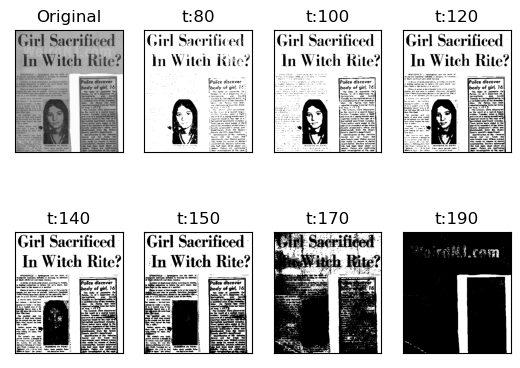

In [12]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지를 그레이 스케일로 읽기
img = cv2.imread('./img/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE) 

thresholds = [80, 100, 120, 140, 150, 170, 190]
imgs = {'Original' : img}

# threshold 를 기준으로 흑백을 나눔
for t in thresholds:
    _, t_img = cv2.threshold(img, t, 255, cv2.THRESH_BINARY) 
    imgs['t:%d'%t] = t_img

for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(2, 4, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

#### mask 연산

In [13]:
import cv2
import numpy as np

# 연산에 사용할 배열 생성
a = np.array([[1, 2]], dtype=np.uint8)
b = np.array([[10, 20]], dtype=np.uint8)

#---② 2번째 요소가 0인 마스크 배열 생성 
mask = np.array([[1, 0]], dtype=np.uint8)

# 누적 할당과의 비교 연산
c1 = cv2.add( a, b , None, mask)
print(c1)
c2 = cv2.add( a, b , b.copy(), mask)
print(c2, b)

[[11  0]]
[[11 20]] [[10 20]]


#### hsv_color_mask

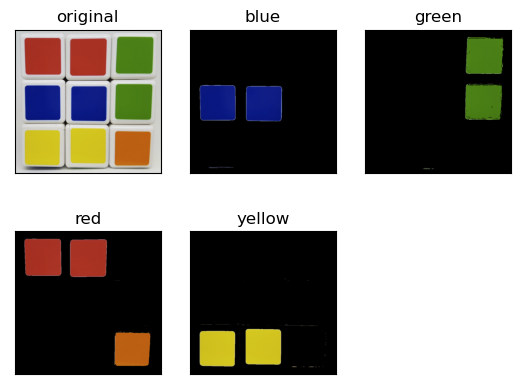

In [14]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# 큐브 영상 읽어서 HSV로 변환
img = cv2.imread("./img/cube.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 색상별 영역(범위) 지정
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])

# 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

# 색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

# 결과 출력
imgs = {'original': img, 'blue':res_blue, 'green':res_green, 
        'red':res_red, 'yellow':res_yellow}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()

### ROI(Region of Interest, 관심 영역)

In [15]:
import cv2
import numpy as np

img = cv2.imread('./img/sunset.jpg')

x=320; y=150; w=50; h=50        # roi 좌표
roi = img[y:y+h, x:x+w]         # roi 지정

print(roi.shape)                # roi shape, (50,50,3)
cv2.rectangle(roi, (0,0), (h-1, w-1), (0,255,0)) # roi 전체에 사각형 그리기
cv2.imshow("img", img)

key = cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

(50, 50, 3)


-1

#### ROI select img

In [7]:
import cv2,  numpy as np

img = cv2.imread('./img/sunset.jpg')

x,y,w,h = cv2.selectROI('img', img, False)

if w and h:
    roi = img[y:y+h, x:x+w]
    cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
    cv2.moveWindow('cropped', 0, 0) # 새창을 화면 좌측 상단에 이동
    cv2.imwrite('./cropped2.jpg', roi)   # ROI 영역만 파일로 저장

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### ROI crop mouse

In [ ]:
import cv2
import numpy as np

isDragging = False                      # 마우스 드래그 상태 저장 
x0, y0, w, h = -1,-1,-1,-1              # 영역 선택 좌표 저장
blue, red = (255,0,0),(0,0,255)         # 색상 값 

def onMouse(event,x,y,flags,param):     # 마우스 이벤트 핸들 함수
    global isDragging, x0, y0, img      # 전역변수 참조
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 마우스 버튼 다운, 드래그 시작
        isDragging = True
        x0 = x
        y0 = y
    elif event == cv2.EVENT_MOUSEMOVE:  # 마우스 움직임
        if isDragging:                  # 드래그 진행 중
            img_draw = img.copy()       # 사각형 그림 표현을 위한 이미지 복제
            cv2.rectangle(img_draw, (x0, y0), (x, y), blue, 2) # 드래그 진행 영역 표시
            cv2.imshow('img', img_draw) # 사각형 표시된 그림 화면 출력
            cv2.waitKey()
            cv2.destroyWindow("img")
            
    elif event == cv2.EVENT_LBUTTONUP:  # 왼쪽 마우스 버튼 업
        if isDragging:                  # 드래그 중지
            isDragging = False          
            w = x - x0                  # 드래그 영역 폭 계산
            h = y - y0                  # 드래그 영역 높이 계산
            print("x:%d, y:%d, w:%d, h:%d" % (x0, y0, w, h))
            if w > 0 and h > 0:         # 폭과 높이가 음수이면 드래그 방향이 옳음
                img_draw = img.copy()   # 선택 영역에 사각형 그림을 표시할 이미지 복제
                # 선택 영역에 빨간 사각형 표시
                cv2.rectangle(img_draw, (x0, y0), (x, y), red, 2) 
                cv2.imshow('img', img_draw) # 빨간 사각형 그려진 이미지 화면 출력
                roi = img[y0:y0+h, x0:x0+w] # 원본 이미지에서 선택 영영만 ROI로 지정
                cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
                cv2.moveWindow('cropped', 0, 0) # 새창을 화면 좌측 상단에 이동
                cv2.imwrite('./cropped.jpg', roi)   # ROI 영역만 파일로 저장
                print("croped.")
            else:
                cv2.imshow('img', img)  # 드래그 방향이 잘못된 경우 사각형 그림이 없는 원본 이미지 출력
                print("좌측 상단에서 우측 하단으로 영역을 드래그 하세요.")

img = cv2.imread('./img/sunset.jpg')
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse) # 마우스 이벤트 등록
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

x:325, y:162, w:54, h:47
croped.


#### 두 이미지간 차이 표시하기

In [3]:
import numpy as np, cv2

# 연산에 필요한 영상을 읽고 그레이스케일로 변환
img1 = cv2.imread('./img/robot_arm1.jpg')
img2 = cv2.imread('./img/robot_arm2.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 두 영상의 절대값 차 연산
diff = cv2.absdiff(img1_gray, img2_gray)

# 차 영상을 극대화 하기 위해 쓰레시홀드 처리 및 컬러로 변환 
_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY) # 픽셀 값이 1 이상인 경우 픽셀 값을 255로 변경
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
diff_red[:,:,2] = 0

# 두 번째 이미지에 변화 부분 표시
spot = cv2.bitwise_xor(img2, diff_red)

# 결과 영상 출력
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)

cv2.waitKey()
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### chromakey

In [4]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# 크로마키 배경 영상과 합성할 배경 영상 읽기
img1 = cv2.imread('./img/man_chromakey.jpg')
img2 = cv2.imread('./img/street.jpg')

cv2.imshow('chromakey', img1)
cv2.imshow('street', img2)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

# ROI 선택을 위한 좌표 계산
height1, width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]
x = (width2 - width1)//2
y = height2 - height1
w = x + width1
h = y + height1

# 크로마키 배경 영상에서 크로마키 영역을 10픽셀 정도로 지정
chromakey = img1[:10, :10, :]
offset = 20

# 크로마키 영역과 영상 전체를 HSV로 변경
hsv_chroma = cv2.cvtColor(chromakey, cv2.COLOR_BGR2HSV)
hsv_img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

cv2.imshow('chromakey_col', hsv_chroma)
cv2.imshow('img', hsv_img)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

# 크로마키 영역의 H값에서 offset 만큼 여유를 두어서 범위 지정
# offset 값은 여러차례 시도 후 결정
#chroma_h = hsv_chroma[0]
chroma_h = hsv_chroma[:,:,0]
lower = np.array([chroma_h.min()-offset, 100, 100])
upper = np.array([chroma_h.max()+offset, 255, 255])

# 마스크 생성 및 마스킹 후 합성
mask = cv2.inRange(hsv_img, lower, upper)  # 크로마키의 녹색 배경인 경우 1 / 녹색배경이 아닌 경우 0
mask_inv = cv2.bitwise_not(mask)           # 크로마키의 녹색 배경인 경우 0 / 녹색배경이 아닌 경우 1

cv2.imshow('mask_inv', mask_inv)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

roi = img2[y:h, x:w]

cv2.imshow('roi', roi)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

fg = cv2.bitwise_and(img1, img1, mask=mask_inv)
bg = cv2.bitwise_and(roi, roi, mask=mask)

cv2.imshow('fg', fg)
cv2.imshow('bg', bg)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

img2[y:h, x:w] = fg + bg

# 결과 출력
cv2.imshow('chromakey', img1)
cv2.imshow('added', img2)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

# 5. filter

### 1) 케니 엣지(canny edge)

In [ ]:
import cv2, time
import numpy as np

img = cv2.imread("./img/sudoku.jpg")


# 케니 엣지 적용 
edges = cv2.Canny(img,100,200)

# 결과 출력
cv2.imshow('Original', img)
cv2.imshow('Canny', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)